# Job Salary Prediction using Machine Learning

## Objective
The objective of this project is to analyze job-related data and build a machine learning model
to predict salaries based on factors such as job title, location, experience, and skills.

## Tools & Technologies
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn

## Platform
Google Colab


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
import os
os.listdir()


['.config', 'sample_data']

In [ ]:
df = pd.read_csv('/content/sample_data/data_science_salaries.csv')
df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [ ]:
## Data Understanding


In [ ]:
df.shape

(6599, 11)

In [ ]:
df.columns


Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


### Target Variable Selection

In this project, `salary_in_usd` is selected as the target variable because it
provides a standardized salary value across different countries and currencies,
making it suitable for predictive modeling.

## Exploratory Data Analysis (EDA)

EDA helps in understanding salary distributions, trends, and relationships
between different job-related features and salary in USD.


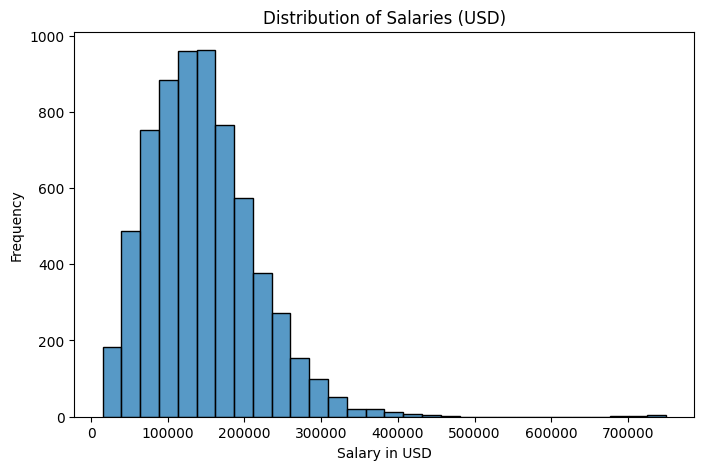

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=30)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


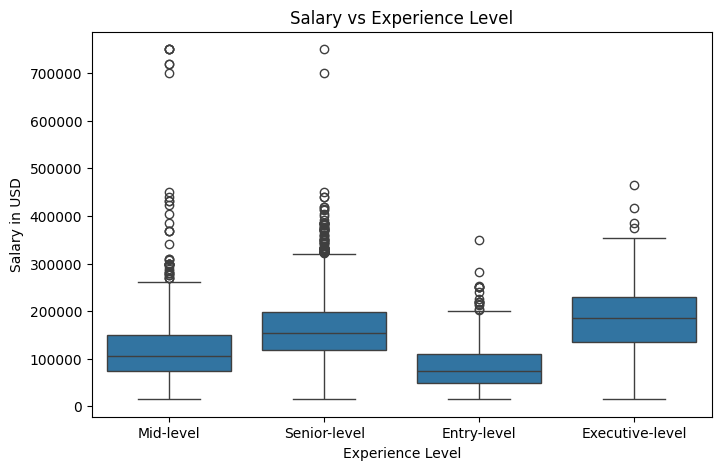

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


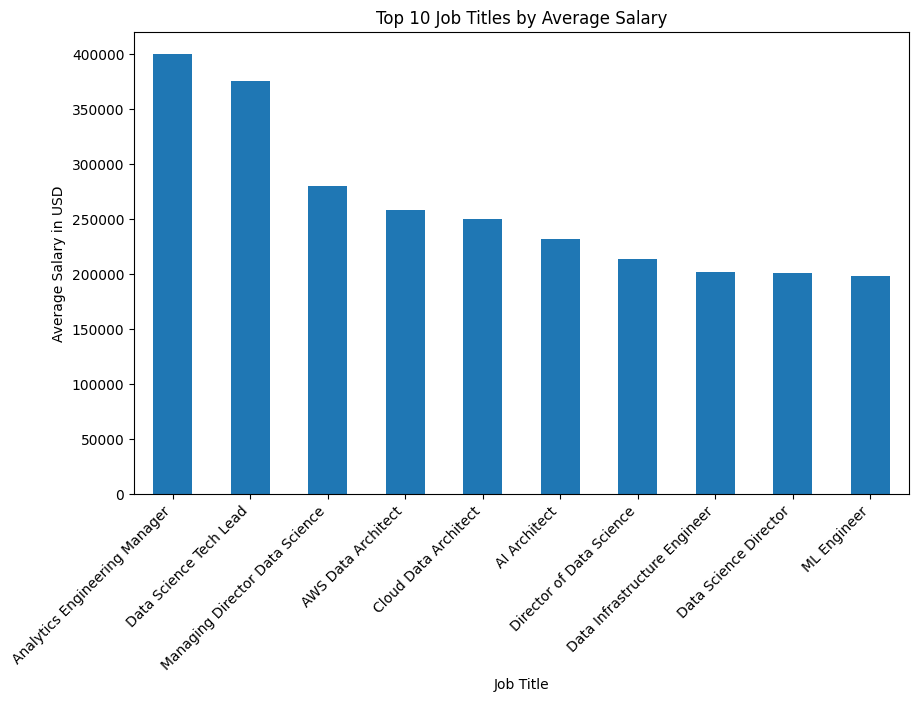

In [ ]:
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_jobs.plot(kind='bar')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df.isnull().sum()


,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [ ]:
df.nunique()


,0
job_title,132
experience_level,4
employment_type,4
work_models,3
work_year,5
employee_residence,87
salary,1833
salary_currency,22
salary_in_usd,2147
company_location,75


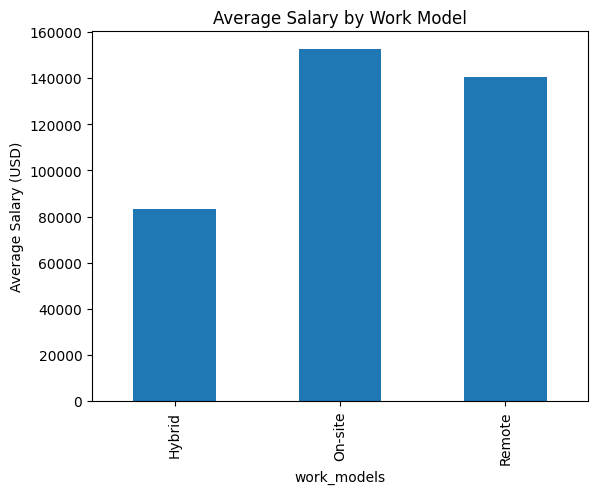

In [ ]:
import matplotlib.pyplot as plt

df.groupby('work_models')['salary_in_usd'].mean().plot(kind='bar')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Work Model')
plt.show()


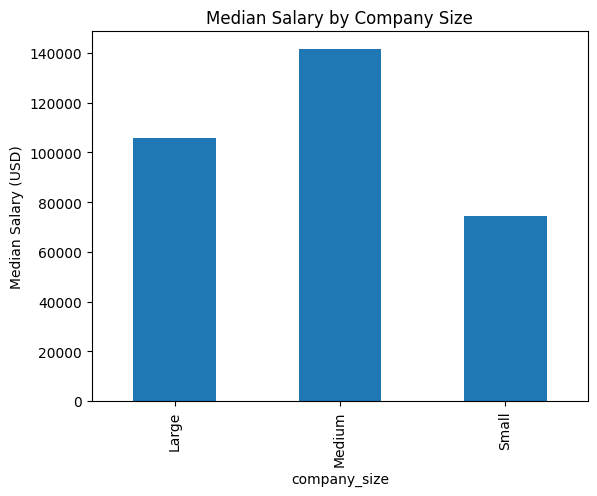

In [ ]:
df.groupby('company_size')['salary_in_usd'].median().plot(kind='bar')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary by Company Size')
plt.show()


In [ ]:
y = df['salary_in_usd']


In [ ]:
X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis=1)


In [ ]:
# Drop rows where salary_in_usd is missing
df = df.dropna(subset=['salary_in_usd'])

# Check shape after dropping
df.shape


(6599, 11)

In [ ]:
df.isnull().sum()


,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [ ]:
# Target variable
y = df['salary_in_usd']

# Feature variables (drop target and raw salary)
X = df.drop(['salary_in_usd', 'salary'], axis=1)

X.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_currency,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,USD,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,USD,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,USD,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,USD,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,USD,United States,Medium


In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numerical_cols


(Index(['job_title', 'experience_level', 'employment_type', 'work_models',
        'employee_residence', 'salary_currency', 'company_location',
        'company_size'],
       dtype='object'),
 Index(['work_year'], dtype='object'))

In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_encoded.head()


,work_year,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,job_title_Analytics Engineering Manager,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Medium,company_size_Small
0,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
X_encoded.shape


(6599, 323)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((5279, 323), (1320, 323))

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(43566.42377549964, np.float64(63083.54408638032), 0.32286319030228905)

In [ ]:
# Pick one sample from test data
sample_X = X_test.iloc[[0]]   # double [[]] is important
sample_y_actual = y_test.iloc[0]

sample_y_pred = lr.predict(sample_X)

print("Actual Salary (USD):", sample_y_actual)
print("Predicted Salary (USD):", sample_y_pred[0])


Actual Salary (USD): 230000
Predicted Salary (USD): 198150.91544168256


In [ ]:
# Compare first 5 predictions
comparison = pd.DataFrame({
    "Actual Salary": y_test[:5].values,
    "Predicted Salary": y_pred[:5]
})

comparison


,Actual Salary,Predicted Salary
0,230000,198150.915442
1,104000,165572.152567
2,100000,182029.114143
3,63040,57975.534809
4,238000,169685.989888


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)


In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(44939.04822486979, np.float64(63909.776638011994), 0.3050095231019945)

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae, mae_rf],
    "RMSE": [rmse, rmse_rf],
    "R2 Score": [r2, r2_rf]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,43566.423775,63083.544086,0.322863
1,Random Forest,44939.048225,63909.776638,0.305010


In [ ]:
# Log transform the target
y_log = np.log1p(y)   # log(1 + y) to safely handle zero values


In [ ]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_encoded, y_log,
    test_size=0.2,
    random_state=42
)


In [ ]:
lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)


LinearRegression()

In [ ]:
# Predict in log scale
y_pred_log = lr_log.predict(X_test)

# Convert back to original salary scale
y_pred_exp = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test_log)


In [ ]:
mae_log = mean_absolute_error(y_test_exp, y_pred_exp)
rmse_log = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2_log = r2_score(y_test_exp, y_pred_exp)

mae_log, rmse_log, r2_log


(41748.198116517, np.float64(62982.96314995048), 0.3250207342438731)

In [ ]:
sample_pred_log = lr_log.predict(sample_X)
sample_pred_salary = np.expm1(sample_pred_log)

print("Actual Salary (USD):", sample_y_actual)
print("Predicted Salary after log transform (USD):", round(sample_pred_salary[0]))


Actual Salary (USD): 230000
Predicted Salary after log transform (USD): 195592


In [ ]:
comparison_log = pd.DataFrame({
    "Model": ["Linear Regression (Original Target)",
              "Linear Regression (Log-Transformed Target)"],
    "MAE": [mae, mae_log],
    "RMSE": [rmse, rmse_log],
    "R2 Score": [r2, r2_log]
})

comparison_log


,Model,MAE,RMSE,R2 Score
0,Linear Regression (Original Target),43566.423775,63083.544086,0.322863
1,Linear Regression (Log-Transformed Target),41748.198117,62982.963150,0.325021


In [ ]:
rf_log = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_log.fit(X_train, y_train_log)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Predict in log scale
y_pred_rf_log = rf_log.predict(X_test)

# Convert back to original scale
y_pred_rf_exp = np.expm1(y_pred_rf_log)


In [ ]:
mae_rf_log = mean_absolute_error(y_test_exp, y_pred_rf_exp)
rmse_rf_log = np.sqrt(mean_squared_error(y_test_exp, y_pred_rf_exp))
r2_rf_log = r2_score(y_test_exp, y_pred_rf_exp)

mae_rf_log, rmse_rf_log, r2_rf_log


(43457.772525283915, np.float64(63530.80886539982), 0.31322729895926793)

In [ ]:
final_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression (Original Target)",
        "Linear Regression (Log Target)",
        "Random Forest (Original Target)",
        "Random Forest (Log Target)"
    ],
    "MAE": [
        mae,
        mae_log,
        mae_rf,
        mae_rf_log
    ],
    "RMSE": [
        rmse,
        rmse_log,
        rmse_rf,
        rmse_rf_log
    ],
    "R2 Score": [
        r2,
        r2_log,
        r2_rf,
        r2_rf_log
    ]
})

final_comparison


,Model,MAE,RMSE,R2 Score
0,Linear Regression (Original Target),43566.423775,63083.544086,0.322863
1,Linear Regression (Log Target),41748.198117,62982.963150,0.325021
2,Random Forest (Original Target),44939.048225,63909.776638,0.305010
3,Random Forest (Log Target),43457.772525,63530.808865,0.313227


In [ ]:
# Save training column order
trained_columns = X_encoded.columns


In [ ]:
def predict_salary(job_title,
                   experience_level,
                   employment_type,
                   work_models,
                   work_year,
                   employee_residence,
                   company_location,
                   company_size):

    # 1. Create input DataFrame
    input_dict = {
        'job_title': job_title,
        'experience_level': experience_level,
        'employment_type': employment_type,
        'work_models': work_models,
        'work_year': work_year,
        'employee_residence': employee_residence,
        'company_location': company_location,
        'company_size': company_size
    }

    input_df = pd.DataFrame([input_dict])

    # 2. One-hot encode input
    input_encoded = pd.get_dummies(input_df)

    # 3. Align columns with training data
    input_encoded = input_encoded.reindex(columns=trained_columns, fill_value=0)

    # 4. Predict log salary
    log_salary_pred = lr_log.predict(input_encoded)

    # 5. Convert back to USD
    salary_pred = np.expm1(log_salary_pred)[0]

    # 6. Return formatted result
    return f"Predicted Salary (USD): ${round(salary_pred):,}"


In [ ]:
predict_salary(
    job_title="Data Scientist",
    experience_level="SE",
    employment_type="FT",
    work_models="Remote",
    work_year=2024,
    employee_residence="US",
    company_location="US",
    company_size="L"
)


'Predicted Salary (USD): $93,066'